In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 4GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img


In [5]:
from PIL import Image
folder_path=r'C:\Users\lap\OneDrive\Desktop\fruits&vegta-project\FruitsAndVegtables\validation'

extensions = []
index = 0

for folder in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path,folder)
    for file in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path,file)
        im = Image.open(file_path)
        if im.format == 'PNG':
        # and is not RGBA
            if im.mode != 'RGBA':
                im.convert("RGBA").save(f"{file_path}")
                print('** Path: {} **'.format(file_path),end='\r',flush=True)
                print(file_path)

In [6]:
batch_size=32
image_size=(224,224)

In [7]:
train_path='FruitsAndVegtables/train/'
val_path='FruitsAndVegtables/validation/'
test_path='FruitsAndVegtables/test/'


In [8]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True 

In [9]:
traindata_gen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 30, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2,
                                   shear_range = 0.15, 
                                   zoom_range = 0.15, 
                                   horizontal_flip = True,
                                   fill_mode="nearest")

train_data = traindata_gen.flow_from_directory(train_path,
                                               target_size=image_size,
                                               batch_size=batch_size,
                                               class_mode='categorical')


Found 3117 images belonging to 36 classes.


In [10]:
valdata_gen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 30, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2,
                                   shear_range = 0.15, 
                                   zoom_range = 0.15, 
                                   horizontal_flip = True,
                                   fill_mode="nearest")

val_data = valdata_gen.flow_from_directory(val_path,
                                           target_size=image_size,
                                           batch_size=batch_size,
                                           class_mode='categorical')

Found 351 images belonging to 36 classes.


In [11]:
testdata_gen = ImageDataGenerator(rescale = 1./255.)

test_data = testdata_gen.flow_from_directory(test_path,
                                           target_size=image_size,
                                           batch_size=batch_size,
                                           class_mode='categorical')

Found 359 images belonging to 36 classes.


In [12]:
test=tf.keras.utils.image_dataset_from_directory(test_path, 
                                                label_mode='categorical',
                                                image_size=image_size,
                                                batch_size=batch_size)

Found 359 files belonging to 36 classes.


In [13]:
val=tf.keras.utils.image_dataset_from_directory(val_path, 
                                                label_mode='categorical',
                                                image_size=image_size,
                                                batch_size=batch_size)

Found 351 files belonging to 36 classes.


In [15]:
train=tf.keras.utils.image_dataset_from_directory(train_path, 
                                                shuffle=True,
                                                labels='inferred', 
                                                label_mode='categorical',
                                                image_size=image_size,
                                                batch_size=batch_size)

Found 3117 files belonging to 36 classes.


In [16]:
class_names=train.class_names

In [17]:
class_names


['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [18]:
test = test.map(lambda x, y: (x/255, y))

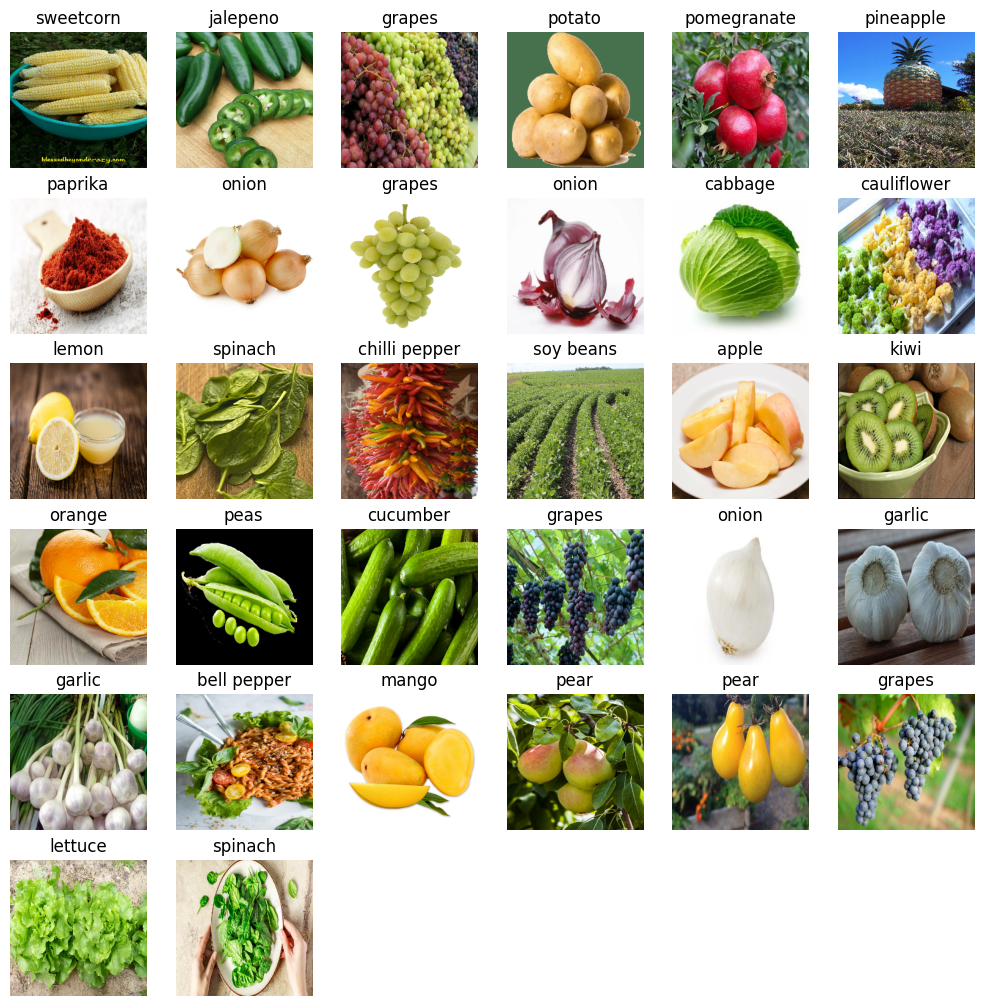

In [20]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])],fontsize = 12)
    plt.axis("off")
    plt.tight_layout(pad=0.5)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,RandomFlip,RandomRotation, RandomZoom, Rescaling, Resizing


In [22]:
model=Sequential()

In [23]:

#model.add(data_augmentation)
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#tf.keras.layers.Dropout(rate=0.2)

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#tf.keras.layers.Dropout(rate=0.2)

model.add(Conv2D(64,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#tf.keras.layers.Dropout(rate=0.1)

model.add(Conv2D(128,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


#tf.keras.layers.Dropout(rate=0.15)

model.add(Conv2D(256,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#tf.keras.layers.Dropout(rate=0.12)

model.add(Conv2D(512,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())

#tf.keras.layers.Dropout(rate=0.12)

model.add(Dense(36,activation='softmax'))

In [24]:
from tensorflow.keras.optimizers import Adam,RMSprop

In [25]:
model.compile(optimizer=RMSprop(learning_rate=0.001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [524]:
logdir='logs'

In [525]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [526]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=30, verbose=1, mode='auto')


In [ ]:
history=model.fit(train_data,epochs=2,validation_data=val_data, validation_steps=10,batch_size=batch_size,callbacks=[tensorboard_callback,early])

In [ ]:
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [18]:
from tensorflow.keras.metrics import Precision, Recall,CategoricalAccuracy
prec=Precision()
rec=Recall()
acc=CategoricalAccuracy()

In [642]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    prec.update_state(y,yhat)
    rec.update_state(y,yhat)
    acc.update_state(y,yhat)

In [ ]:
print(f'Precision: {prec.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

This image most likely belongs to onion with a 90.82 percent confidence.


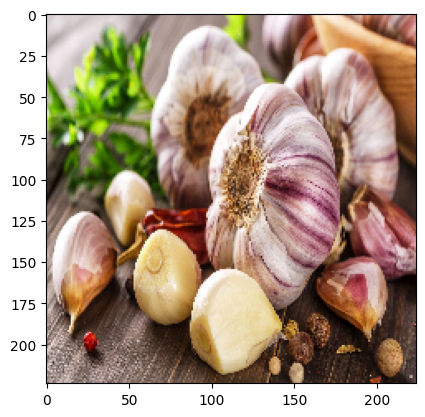

In [645]:
img = tf.keras.utils.load_img(
    r'new_test_imgs\garlic.jpg', target_size=image_size
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array/255, 0) # Create a batch

predictions = model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * predictions.max())
)

In [621]:

model.save(os.path.join('models','tl_version4.h5'))


In [32]:
from keras.models import load_model
saved_model = load_model(r"models\version5.h5")

In [33]:
saved_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization_94 (Batc (None, 222, 222, 16)      64        
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 109, 109, 32)      4640      
_________________________________________________________________
batch_normalization_95 (Batc (None, 109, 109, 32)      128       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 52, 52, 64)      

In [34]:
from tensorflow.keras.metrics import Precision, Recall,CategoricalAccuracy
prec=Precision()
rec=Recall()
acc=CategoricalAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=saved_model.predict(X)
    prec.update_state(y,yhat)
    rec.update_state(y,yhat)
    acc.update_state(y,yhat)

In [37]:
print(f'Precision: {prec.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9805014133453369, Recall: 0.9805014133453369, Accuracy: 0.9805014133453369


In [38]:
import cv2
import os
folder=r'C:\Users\lap\OneDrive\Desktop\fruits&vegta-project\new_test_imgs'
images = []
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        images.append(img)

In [40]:
preds=[]
percen = []

for image in images:
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = tf.image.resize(image,(224,224))
    img_array = tf.keras.utils.img_to_array(image)
    img_array = tf.expand_dims(img_array/255, 0) # Create a batch

    predictions = saved_model.predict(img_array)
    preds.append(class_names[np.argmax(predictions)])
    percen.append(100 * predictions.max())
    
    


In [42]:
list=[]
for i in range(36):
    list.append(i)

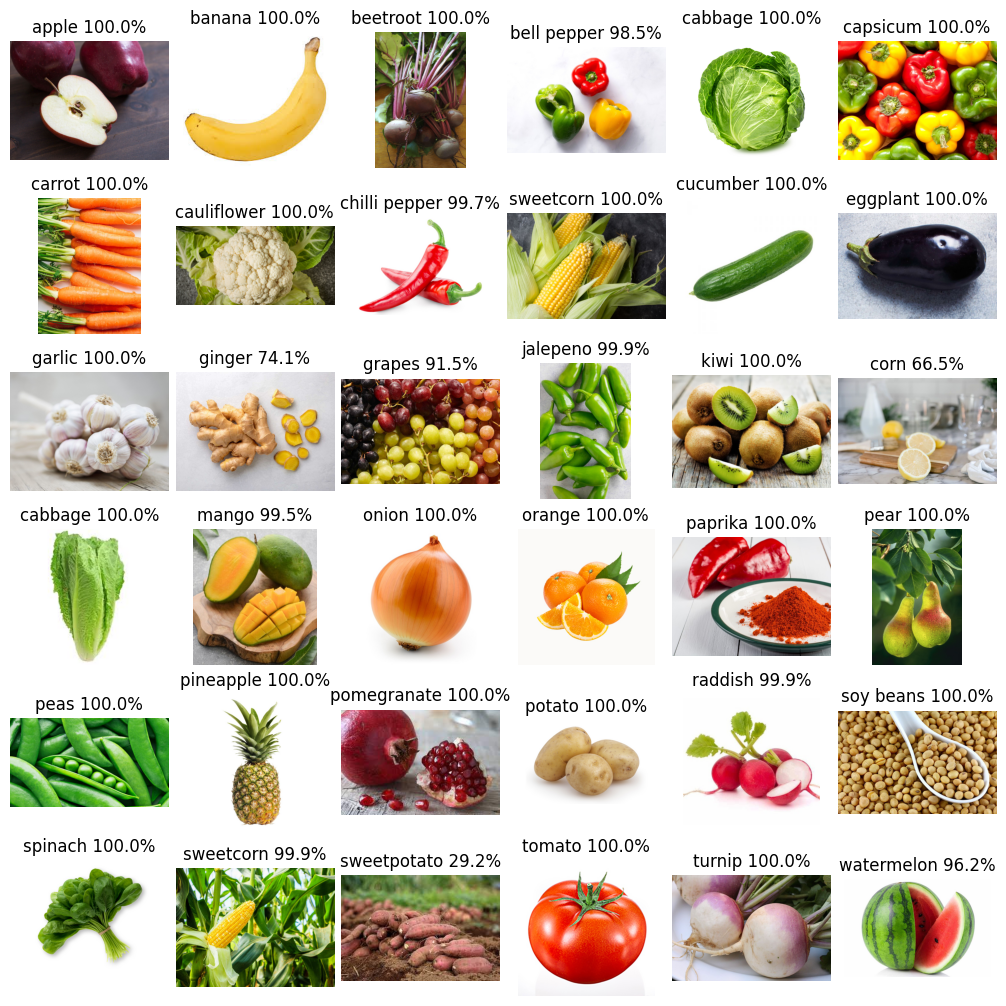

In [43]:
plt.figure(figsize=(10, 10))

for n, i in enumerate(list):
    ax = plt.subplot(6, 6, n + 1)
    plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
    plt.title("{} {:.1f}%"
    .format(preds[i], percen[i],fontsize = 5))
    plt.axis("off")
    plt.tight_layout(pad=0.5)
      
      
            